In [1]:
from collections import defaultdict
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#"D:\MScAI\Semester1\CS5062MachineLearning\AssessmII\CS5062_AssessmentII_Dataset\"

In [3]:
import os
os.chdir("D:/MScAI/Semester1/CS5062MachineLearning/AssessmII/CS5062_AssessmentII_Dataset/")

In [4]:
X_train_path = "D:/MScAI/Semester1/CS5062MachineLearning/AssessmII/CS5062_AssessmentII_Dataset/train/X_train/"
X_test_path = "D:/MScAI/Semester1/CS5062MachineLearning/AssessmII/CS5062_AssessmentII_Dataset/test/X_test/"

In [5]:
#Loading training data from files
X_filelist = os.listdir(X_train_path)
print(X_filelist)        

# X_train_df = pd.concat([pd.read_csv(X_train_path+item, names=[item[:-4]], header=None) for item in X_filelist], axis=1)
# #print(X_train_df)
# print(X_train_df.shape)
# X_train_df.head()
X_train=list()
for name in X_filelist:
    data = pd.read_csv(X_train_path+name, header=None, delim_whitespace=True)
    X_train.append(data)
# stack group so that features are the 3rd dimension
X_train = np.dstack(X_train)
X_train[0:5]
X_train.shape

['acc_x_train.txt', 'acc_y_train.txt', 'acc_z_train.txt', 'gyro_x_train.txt', 'gyro_y_train.txt', 'gyro_z_train.txt']


(7352, 128, 6)

In [6]:
y_train_df = pd.read_csv("D:/MScAI/Semester1/CS5062MachineLearning/AssessmII/CS5062_AssessmentII_Dataset/train/y_train.txt", header=None)
#print(y_train_df)
print(y_train_df.shape)

(7352, 1)


In [7]:
# print(X_train_df.dtypes)
# #s=X_train_df["acc_x_train"][0]

# # floats_list = []
# # for item in s.split():
# #   floats_list.append(float(item))

# #print(floats_list)
# for key, value in X_train_df.iteritems():
#     floats_list = []
#     for item in value.str.split():
#         floats_list.append(item)
#     value=floats_list
    
    
# print(X_train_df.shape)
# #X_train_df.head()
# print(X_train_df.dtypes)
# X_train_df.head()

In [8]:
# X_train = X_train_df.values
# y_train = y_train_df.values
# print(len(X_train), len(X_train[0]))
# print(X_train.shape)
# print(len(y_train))
# print(y_train.shape)
# print('ROW',X_train[0])
# print('column ', X_train[1])

In [9]:
#Loading testing data from files
X_filelist = os.listdir(X_test_path)
print(X_filelist)        

X_test=list()
for name in X_filelist:
    data = pd.read_csv(X_test_path+name, header=None, delim_whitespace=True)
    X_test.append(data)
# stack group so that features are the 3rd dimension
X_test = np.dstack(X_test)
X_test[0:5]
X_test.shape

['acc_x_test.txt', 'acc_y_test.txt', 'acc_z_test.txt', 'gyro_x_test.txt', 'gyro_y_test.txt', 'gyro_z_test.txt']


(2947, 128, 6)

In [10]:
y_test_df = pd.read_csv("D:/MScAI/Semester1/CS5062MachineLearning/AssessmII/CS5062_AssessmentII_Dataset/test/y_test.txt", header=None)
#print(y_test_df)
print(y_test_df.shape)

(2947, 1)


In [11]:
# summarize the balance of classes in an output variable column
def class_breakdown(data):
    # convert the numpy array into a dataframe
    df = pd.DataFrame(data)
    # group data by the class value and calculate the number of rows
    counts = df.groupby(0).size()
    # retrieve raw rows
    counts = counts.values
    # summarize
    for i in range(len(counts)):
        percent = counts[i] / len(df) * 100
        print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

In [12]:
# summarize class breakdown
print('Train Dataset')
class_breakdown(y_train_df)

Train Dataset
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138


In [13]:
# summarize class breakdown
print('Test Dataset')
class_breakdown(y_test_df)

Test Dataset
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222


In [14]:
# summarize combined class breakdown
print('Both')
combined = np.vstack((y_train_df, y_test_df))
class_breakdown(combined)

Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


In [15]:
# convert a series of windows to a 1D list
def to_series(windows):
    series = list()
    for window in windows:
        # remove the overlap from the window
        half = int(len(window) / 2) - 1
        for value in window[-half:]:
            series.append(value)
    return series
 

In [16]:
y_train = np.array(y_train_df)
y_test = np.array(y_test_df)

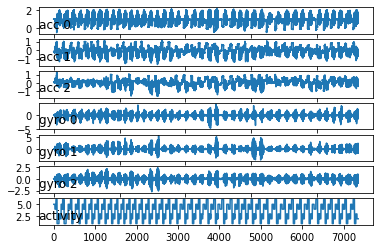

In [17]:
from matplotlib import pyplot

pyplot.figure()
# determine the total number of plots
n, off = X_train.shape[2] + 1, 0
# plot acc
for i in range(3):
    pyplot.subplot(n, 1, off+1)
    pyplot.plot(to_series(X_train[:, :, off]))
    pyplot.title('acc '+str(i), y=0, loc='left')
    off += 1
# plot gyro
for i in range(3):
    pyplot.subplot(n, 1, off+1)
    pyplot.plot(to_series(X_train[:, :, off]))
    pyplot.title('gyro '+str(i), y=0, loc='left')
    off += 1
pyplot.subplot(n, 1, n)
pyplot.plot(y_train_df)
pyplot.title('activity', y=0, loc='left')
pyplot.show()

In [18]:
# group data by activity
def data_by_activity(X, y, activities):
    # group windows by activity
    return {a:X[y[:,0]==a, :, :] for a in activities}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


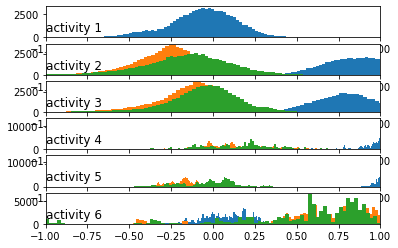

In [19]:
# plot histograms for each activity for a subject

# get a list of unique activities for the subject
activity_ids = np.unique(y_train[:,0])
# group windows by activity
grouped = data_by_activity(X_train, y_train, activity_ids)
# plot per activity, histograms for each axis
pyplot.figure()
xaxis = None
for k in range(len(activity_ids)):
    act_id = activity_ids[k]
    # total acceleration
    for i in range(3):
        ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
        ax.set_xlim(-1,1)
        if k == 0:
            xaxis = ax
        pyplot.hist(to_series(grouped[act_id][:,:,i]), bins=100)
        pyplot.title('activity '+str(act_id), y=0, loc='left')
pyplot.show()

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from keras.utils import to_categorical

In [22]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

verbose, epochs, batch_size = 1, 25, 64
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
# reshape into subsequences (samples, time steps, rows, cols, channels)
n_steps, n_length = 4, 32
X_train = X_train.reshape((X_train.shape[0], n_steps, 1, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, 1, n_length, n_features))

In [23]:
# # define model
# def evaluate_model(X_train, y_train, X_test, y_test):
#     verbose, epochs, batch_size = 1, 25, 64
#     n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
#     # reshape into subsequences (samples, time steps, rows, cols, channels)
#     n_steps, n_length = 4, 32
#     X_train = X_train.reshape((X_train.shape[0], n_steps, 1, n_length, n_features))
#     X_test = X_test.reshape((X_test.shape[0], n_steps, 1, n_length, n_features))
#     # define model
#     model = Sequential()
#     model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
#     model.add(Dropout(0.5))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(n_outputs, activation='softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     # fit network
#     history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=verbose)
#     # evaluate model
#     _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
#     return accuracy, history
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=verbose)
# # evaluate model
# _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7352 samples, validate on 2947 samples
Epoch 1/25
7352/7352 [==============================] - 7s 941us/step - loss: 0.7092 - accuracy: 0.7100 - val_loss: 0.6849 - val_accuracy: 0.7475
Epoch 2/25
7352/7352 [==============================] - 7s 890us/step - loss: 0.3431 - accuracy: 0.8647 - val_loss: 0.5638 - val_accuracy: 0.8018
Epoch 3/25
7352/7352 [==============================] - 7s 986us/step - loss: 0.2509 - accuracy: 0.9022 - val_loss: 0.5650 - val_accuracy: 0.8419
Epoch 4/25
7352/7352 [==============================] - 7s 956us/step - loss: 0.2001 - accuracy: 0.9191 - val_loss: 0.7542 - val_accuracy: 0.8273
Epoch 5/25
7352/7352 [==============================] - 7s 970us/step - loss: 0.1705 - accuracy: 0.9309 - val_loss: 1.0090 - val_accuracy: 0.8096
Epoch 6/25
7352/7352 [==============================] - 7s 1ms/step - loss: 0.1516 - accuracy: 0.9380 - val_loss: 0.7558 - val_

In [23]:
# # summarize scores
# def summarize_results(scores):
#     print(scores)
#     m, s = np.mean(scores), np.std(scores)
#     print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))


In [24]:
# # run an experiment
# def run_experiment(X_train, y_train, X_test, y_test):
#     repeats=5
#     # repeat experiment
#     scores = list()
#     for r in range(repeats):
#         score, history = evaluate_model(X_train, y_train, X_test, y_test)
#         score = score * 100.0
#         print('----------->#%d: %.3f' % (r+1, score))
#         scores.append(score)
#     # summarize results
#     summarize_results(scores)
#     return history
 
# # run the experiment
# history = run_experiment(X_train, y_train, X_test, y_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7352 samples, validate on 2947 samples
Epoch 1/25
7352/7352 [==============================] - 7s 889us/step - loss: 0.6757 - accuracy: 0.7303 - val_loss: 0.6642 - val_accuracy: 0.7536
Epoch 2/25
7352/7352 [==============================] - 7s 890us/step - loss: 0.3611 - accuracy: 0.8566 - val_loss: 0.8009 - val_accuracy: 0.7825
Epoch 3/25
7352/7352 [==============================] - 7s 935us/step - loss: 0.2657 - accuracy: 0.8953 - val_loss: 0.9468 - val_accuracy: 0.8076
Epoch 4/25
7352/7352 [==============================] - 7s 965us/step - loss: 0.2056 - accuracy: 0.9192 - val_loss: 1.1425 - val_accuracy: 0.8103
Epoch 5/25
7352/7352 [==============================] - 7s 965us/step - loss: 0.1815 - accuracy: 0.9252 - val_loss: 0.7066 - val_accuracy: 0.8202
Epoch 6/25
7352/7352 [==============================] - 8s 1ms/step - loss: 0.1535 - accuracy: 0.9368 - val_loss: 0.7994 - val_

7352/7352 [==============================] - 8s 1ms/step - loss: 0.6891 - accuracy: 0.7209 - val_loss: 0.7098 - val_accuracy: 0.7509
Epoch 2/25
7352/7352 [==============================] - 7s 993us/step - loss: 0.3314 - accuracy: 0.8705 - val_loss: 0.6779 - val_accuracy: 0.8124
Epoch 3/25
7352/7352 [==============================] - 7s 1ms/step - loss: 0.2415 - accuracy: 0.9082 - val_loss: 0.6799 - val_accuracy: 0.8232
Epoch 4/25
7352/7352 [==============================] - 7s 980us/step - loss: 0.2045 - accuracy: 0.9195 - val_loss: 0.9564 - val_accuracy: 0.8110
Epoch 5/25
7352/7352 [==============================] - 7s 1ms/step - loss: 0.1806 - accuracy: 0.9289 - val_loss: 0.8139 - val_accuracy: 0.8388
Epoch 6/25
7352/7352 [==============================] - 7s 963us/step - loss: 0.1590 - accuracy: 0.9384 - val_loss: 0.9889 - val_accuracy: 0.8303
Epoch 7/25
7352/7352 [==============================] - 7s 993us/step - loss: 0.1404 - accuracy: 0.9408 - val_loss: 1.1537 - val_accuracy: 0.

7352/7352 [==============================] - 7s 956us/step - loss: 0.1721 - accuracy: 0.9286 - val_loss: 1.3434 - val_accuracy: 0.7879
Epoch 6/25
7352/7352 [==============================] - 7s 946us/step - loss: 0.1664 - accuracy: 0.9309 - val_loss: 1.1789 - val_accuracy: 0.8317
Epoch 7/25
7352/7352 [==============================] - 7s 967us/step - loss: 0.1498 - accuracy: 0.9418 - val_loss: 1.2124 - val_accuracy: 0.8347
Epoch 8/25
7352/7352 [==============================] - 7s 960us/step - loss: 0.1420 - accuracy: 0.9414 - val_loss: 1.1656 - val_accuracy: 0.8480
Epoch 9/25
7352/7352 [==============================] - 7s 940us/step - loss: 0.1293 - accuracy: 0.9461 - val_loss: 1.1974 - val_accuracy: 0.8426
Epoch 10/25
7352/7352 [==============================] - 7s 967us/step - loss: 0.1172 - accuracy: 0.9490 - val_loss: 1.7259 - val_accuracy: 0.8191
Epoch 11/25
7352/7352 [==============================] - 7s 940us/step - loss: 0.1160 - accuracy: 0.9498 - val_loss: 1.4097 - val_accu

In [25]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [44]:
model.evaluate(X_test, y_test)

2947/2947 [==============================] - 1s 191us/step


[1.0091601451691583, 0.8724126219749451]

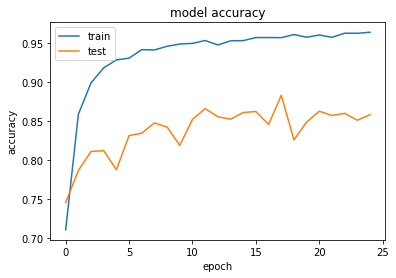

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

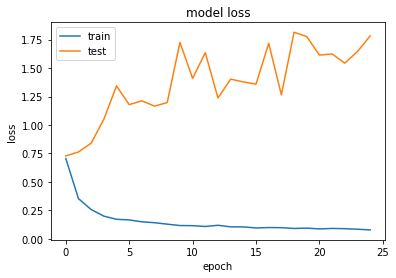

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [31]:
# history=classifier.fit_generator(training_set,
#                         steps_per_epoch =9000 // batchsize,
#                         epochs = 30,
#                         validation_data =test_set,
#                         validation_steps = 4500 // batchsize)

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test_arr = np.argmax(y_test, axis=-1)
print(y_pred[0:5], y_test_arr[0:5])

[5 5 5 5 5] [5 5 5 5 5]


In [35]:
#print('Confusion Matrix')
cm = confusion_matrix(y_test_arr, y_pred)
# print('Classification Report')
# target_names = X_test.classes
# class_labels = list(X_test.class_indices.keys())   
# report = classification_report(target_names, y_pred, target_names=class_labels)
# print(report)

In [56]:
def plot_conf_matr(cm, classes, normalize = False, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[423  23  46   0   4   0]
 [  7 434  30   0   0   0]
 [  6  10 384   1  19   0]
 [  0  21   0 425  42   3]
 [  1  39   0 109 383   0]
 [  0  15   0   0   0 522]]


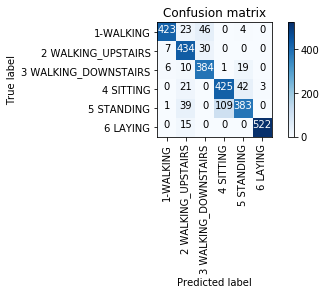

In [57]:
cm_plot_labels = ['1-WALKING', '2 WALKING_UPSTAIRS','3 WALKING_DOWNSTAIRS',
                  '4 SITTING', '5 STANDING', '6 LAYING']
plot_conf_matr(cm, cm_plot_labels)

In [61]:
tp = sum(cm[i][i] for i in range(len(cm)))
fp = np.triu(cm).sum()-np.trace(cm)
fn = np.tril(cm).sum()-np.trace(cm)

recall=tp/(tp+fn)
precision=tp/(tp+fp) 
print("recall    ", recall)
print("precision ", precision)       

recall     0.9251529327096077
precision  0.9386637458926615


In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


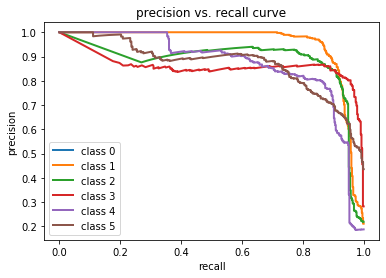

In [51]:
# precision recall curve
n_classes = 6
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        Y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


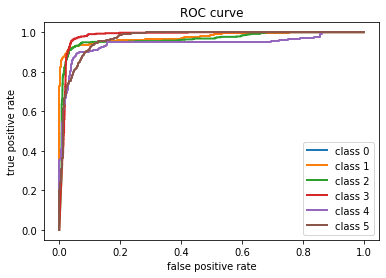

In [55]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  Y_pred[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()